In [11]:
import pandas as pd
import numpy as np
import os

from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import json

In [12]:
ranking_df = pd.read_csv(os.path.join('data','ranking_all_201701_202206.csv'), parse_dates=['Date','release_date'], index_col=0)

/home/fterroso/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [13]:
def print_song_info(song_id_):
    info_= ranking_df[ranking_df['song_id']==song_id_][['Track Name', 'Artist']].values[0]
    print(f'Track name: {info_[0]}. Artist: {info_[1]}')

In [14]:
ranking_df.head()

,Position,Track Name,Artist,Streams,Date,Region,song_id,release_date
0,1,Échame La Culpa,"Luis Fonsi, Demi Lovato",26459,2018-01-01,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17
1,2,Corazón,"Maluma, Nego do Borel",25743,2018-01-01,Ecuador,4lESS6vuruP6a79KWRaQou,2017-11-03
2,3,Déjala Que Vuelva (feat. Manuel Turizo),Piso 21,24315,2018-01-01,Ecuador,33bnxcjePIkcmNjEFTJX0l,2017-10-20
3,4,Criminal,"Natti Natasha, Ozuna",22060,2018-01-01,Ecuador,6Za3190Sbw39BBC77WSS1C,2017-11-10
4,5,Mayores,"Becky G, Bad Bunny",18587,2018-01-01,Ecuador,7JNh1cfm0eXjqFVOzKLyau,2017-07-14


Time period covered by the dataset

In [15]:
ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22719346 entries, 0 to 22869873
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Position      int64         
 1   Track Name    object        
 2   Artist        object        
 3   Streams       int64         
 4   Date          datetime64[ns]
 5   Region        object        
 6   song_id       object        
 7   release_date  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 1.5+ GB


Number of total entries in the dataset

In [16]:
ranking_df.shape

(22719346, 8)

Number of songs

In [17]:
n_total_songs = ranking_df['song_id'].nunique()

In [18]:
print(f'The total number of songs is: {n_total_songs}')
print(f'The total number of countries is: {ranking_df.Region.nunique()}')

The total number of songs is: 125935
The total number of countries is: 71


In [19]:
ranking_df['Region'].unique()

array(['Ecuador', 'Portugal', 'Panama', 'Italy', 'Germany', 'Finland',
       'Estonia', 'Hungary', 'Spain', 'Peru', 'Slovakia', 'Ireland',
       'Indonesia', 'Iceland', 'Brazil', 'Canada', 'Belgium', 'Uruguay',
       'CostaRica', 'Malaysia', 'Mexico', 'France', 'Argentina', 'Norway',
       'Lithuania', 'Philippines', 'Taiwan', 'NewZealand', 'Turkey',
       'USA', 'ElSalvador', 'Chile', 'Japan', 'Honduras', 'Guatemala',
       'Switzerland', 'Denmark', 'Bolivia', 'Poland', 'Austria', 'Sweden',
       'CzechRepublic', 'Netherlands', 'Columbia', 'Singapore',
       'DominicanRepublic', 'Luxemborg', 'UnitedKingdom', 'World',
       'Paraguay', 'Australia', 'Latvia', 'Greece', 'HongKong', 'Russia',
       'UnitedArabEmirates', 'Belarus', 'India', 'SouthAfrica', 'Romania',
       'Ukraine', 'Egypt', 'Nigeria', 'Korea', 'Kazakhstan',
       'SaudiArabia', 'Nicaragua', 'Marocco', 'Israel', 'Bulgaria',
       'Vietnam'], dtype=object)

Covered dates

In [20]:
ranking_df['Date'].min(), ranking_df['Date'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2022-06-06 00:00:00'))

In [21]:
s=ranking_df.groupby(['song_id','Region'])['Date'].min().to_frame()

In [22]:
s

Date
song_id                Region              
000RW47rhEkSqjgTrZx7YX Brazil    2021-04-23
000xQL6tZNLJzIrtIgxqSl Argentina 2017-04-08
                       Australia 2017-03-24
                       Austria   2017-03-24
                       Belgium   2017-03-24
...                                     ...
7zzU5vd1GrHpNjwq3HpIe3 France    2020-10-16
                       Marocco   2020-10-16
7zzbnhCpuuHOCrhBGvgwpp Lithuania 2021-05-21
7zzhRAobAnNjarw2FAWt65 Israel    2020-04-08
7zzhknA0A39TH81meuX7WA France    2019-10-04

[387196 rows x 1 columns]

### Target countries

In [46]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

/home/fterroso/.local/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [47]:
target_countries= ["Argentina" ,"Australia", "Austria","Belarus", 
                      "Belgium" ,"Brazil" , "Bulgaria","Canada", 
                      "Denmark" , "Estonia", "Finland" ,"France"  , 
                      "Germany" ,"Greece"  , "Hungary" ,"Iceland", 
                      "Indonesia" ,"Ireland" , "Italy","Kazakhstan", 
                      "Latvia","Lithuania", "Luxembourg","Malaysia", 
                      "Morocco" ,"Netherlands","New Zealand" ,"Norway" , 
                      "Paraguay"  ,"Philippines" , "Poland" ,"Portugal" ,
                      "Romania","Saudi Arabia", "Singapore","Slovakia",
                      "South Africa" ,"Sweden"  , "Switzerland" , "United Arab Emirates"  , 
                      "United Kingdom" ,"United States of America","Uruguay",
                       'Ecuador', 'Panama', 'Spain', 'Peru','Uruguay',
                       'Costa Rica',  'Mexico',  'Norway','Taiwan', 
                       'El Salvador', 'Chile', 'Japan', 'Honduras', 'Guatemala',
                       'Bolivia',  'CzechRepublic','Dominican Republic', 
                        'Hong Kong', 'Russia',
                        'India','Ukraine', 'Egypt', 'Nigeria', 'South Korea',
                        'Nicaragua',  'Israel','Vietnam']

In [48]:
target_countries_gdf=world[world['name'].isin(target_countries)]

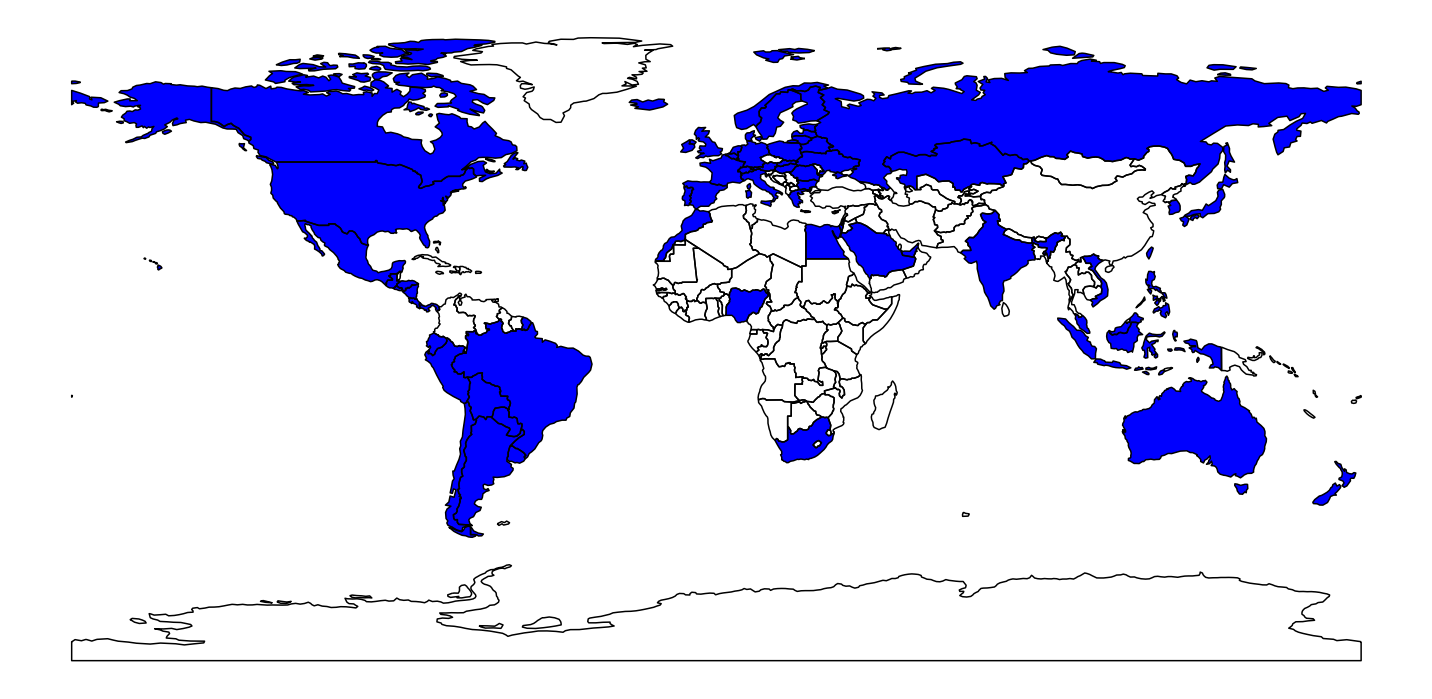

In [51]:
ax= target_countries_gdf.plot(color='blue', figsize=(20,15))

world.boundary.plot(ax=ax, color='black');
ax.set_axis_off()
plt.tight_layout()
plt.savefig(os.path.join('figs',f'01_target_countries.png'),bbox_inches='tight')

## Visualization of the dataset

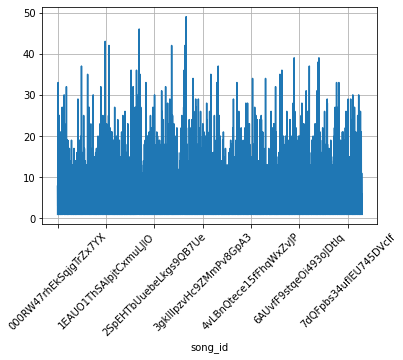

In [23]:
days_per_song= s.groupby(['song_id'])['Date'].nunique()
days_per_song.plot(grid=True, rot=45);

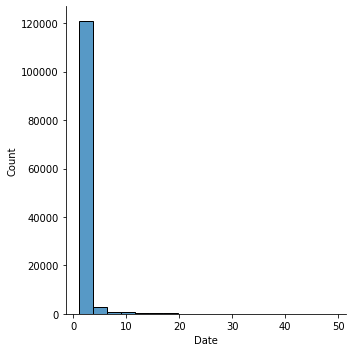

In [24]:
sns.displot(days_per_song);

### Remove songs appearing in duplicate countries initially

In [25]:
def remove_duplicate_songs_fn(ranking_df_):
    release_ranking_df = ranking_df_[ranking_df_['Date']== ranking_df_['release_date']]
    num_initial_lists_df = release_ranking_df.groupby('song_id').size().to_frame()
    #print(num_initial_lists_df)
    num_initial_lists_df.columns =['num_lists']
    songs_with_one_initial_list = num_initial_lists_df[num_initial_lists_df['num_lists']==1].index.to_list()
    #print(songs_with_one_initial_list)
    return ranking_df_[ranking_df_['song_id'].isin(songs_with_one_initial_list)]   

In [26]:
clean_ranking_df = remove_duplicate_songs_fn(ranking_df)

In [27]:
clean_ranking_df.head()

,Position,Track Name,Artist,Streams,Date,Region,song_id,release_date
16,17,Olha a Explosão,MC Kevinho,12388,2018-01-01,Ecuador,6m2LNopVJKsvBB9l7Z1rwn,2017-01-01
19,20,Besame,"Valentino, Manuel Turizo",11127,2018-01-01,Ecuador,7Ckhk1XW5NV2k4jpqtQNlz,2017-06-03
22,23,Una Lady Como Tú,Manuel Turizo,10766,2018-01-01,Ecuador,7MHN1aCFtLXjownGhvEQlF,2017-04-12
25,26,Scooby Doo Pa Pa,Dj Kass,9879,2018-01-01,Ecuador,1xndOD8CreR5ctkOv5G1LN,2017-12-08
28,29,Déjate Llevar,"Juan Magán, Belinda, Manuel Turizo, Snova, B-Case",8995,2018-01-01,Ecuador,3xWEI23MLJrD0dpDcDUTW6,2017-11-28


In [28]:
clean_ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8111692 entries, 16 to 22869868
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Position      int64         
 1   Track Name    object        
 2   Artist        object        
 3   Streams       int64         
 4   Date          datetime64[ns]
 5   Region        object        
 6   song_id       object        
 7   release_date  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 557.0+ MB


### Remove songs in only one country

In [29]:
clean_ranking_df['song_id'].nunique()

100941

In [30]:
n_countries_per_song = clean_ranking_df.groupby('song_id')['Region'].nunique()
n_countries_per_song[n_countries_per_song>1]

song_id
007d7JT41sSc1HqWTs4uw7     7
007ogFejDqJKzEXDUDF8Nf     2
00LX4aUgpDFG4zZO1H3Lx8     2
00NpdPvXFERf1USRAcHkT3     2
00Wbi90nyiEUUfpGxddi2x     3
                          ..
7zsgBOY20sX0Z8L4RTdU3Y     2
7zuM6FYdo5XhiocMPDkc0Q     2
7zwn1eykZtZ5LODrf7c0tS     8
7zxRMhXxJMQCeDDg0rKAVo    12
7zxd3J5hMPeLN71VS8vnE4    11
Name: Region, Length: 8856, dtype: int64

In [31]:
songs_to_keep=n_countries_per_song[n_countries_per_song>1].index.to_list()

In [32]:
clean_ranking_df = clean_ranking_df[clean_ranking_df['song_id'].isin(songs_to_keep)]

In [33]:
clean_ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3600361 entries, 16 to 22869868
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Position      int64         
 1   Track Name    object        
 2   Artist        object        
 3   Streams       int64         
 4   Date          datetime64[ns]
 5   Region        object        
 6   song_id       object        
 7   release_date  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 247.2+ MB


In [34]:
clean_ranking_df['song_id'].nunique()

8856

In [35]:
clean_ranking_df.to_csv(os.path.join('data', 'clean_ranking_2017_2022.csv'))

### Generate songs' timeseries

In [36]:
def generate_songs_timeseries_fin(clean_ranking_df_):
    num_countries_lst = []
    total_countries_per_song = {}
    songs_ids = clean_ranking_df_['song_id'].unique()
    
    
    for song_id in tqdm(clean_ranking_df_['song_id'].unique()):
        song_df =clean_ranking_df_[clean_ranking_df_['song_id']==song_id]
        song_dates = song_df['Date'].unique()
        song_dates.sort()
        num_day = 1
        for d in song_dates:
            song_date_df = song_df[song_df['Date']==d]
            
            current_countries = set(song_date_df['Region'].unique())
            total_countries =total_countries_per_song.get(song_id,set())
            
            in_countries = current_countries - total_countries
            out_countries = total_countries- current_countries


            total_countries=total_countries.union(current_countries)
            total_countries_per_song[song_id]= total_countries


            num_countries_lst.append((song_id,num_day,len(total_countries), len(current_countries), len(in_countries), len(out_countries)))
            
            #print(d, num_countries)
            #num_countries_lst.append((song_id,num_day,num_countries))
            num_day +=1
    num_countries_df_ = pd.DataFrame.from_records(num_countries_lst, columns='song_id num_day total_countries current_countries inc dec'.split())
    num_countries_df_.to_csv(os.path.join('data', 'raw_songs_timeseries.csv'))
    return num_countries_df_

In [37]:
songs_ts = generate_songs_timeseries_fin(clean_ranking_df)

  0%|          | 0/8856 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
songs_ts['dec'].value_counts(bins=10)

In [ ]:
songs_ts.info()

### Remove abnormal increments

In [ ]:
songs_ts['inc'].value_counts(bins=5)

In [ ]:
songs_to_remove= songs_ts[songs_ts['inc']>10]['song_id'].unique()

In [ ]:
songs_to_remove

In [ ]:
songs_clean_ts= songs_ts[~songs_ts['song_id'].isin(songs_to_remove)]

In [ ]:
songs_clean_ts.head()

In [ ]:
songs_clean_ts.info()

In [ ]:
print(f'Num of songs: {songs_clean_ts.song_id.nunique()}, ({round(songs_clean_ts.song_id.nunique()/n_total_songs,3)} %)')
print(f'Max. total number of countries for a song: {songs_clean_ts.total_countries.max()}')
print(f'Min. total number of countries for a song: {songs_clean_ts.total_countries.min()}')
print(f'Max. current number of countries for a song: {songs_clean_ts.current_countries.max()}')
print(f'Max. increment for a song: {songs_clean_ts.inc.max()}')
print(f'Max. decrement for a song: {songs_clean_ts.dec.max()}')

In [ ]:
sns.distplot(songs_clean_ts['inc']);

In [ ]:
songs_clean_ts[songs_clean_ts['inc']>=10]

In [ ]:
#print_song_info('5yuShbu70mtHXY0yLzCQLQ')

### Plot songs' timeseries

In [ ]:
def plot_all_songs_evol_fn(songs_ts_, col_name):
    ax= None
    song_ids=songs_ts_['song_id'].sample(50)
    for song_id in song_ids:
        if ax is None:
            ax=songs_ts_[songs_ts_['song_id']==song_id].plot(x='num_day',y=col_name, legend=False)
        else:
            songs_ts_[songs_ts_['song_id']==song_id].plot(ax=ax,x='num_day',y=col_name, legend=False)


In [ ]:
plot_all_songs_evol_fn(songs_clean_ts, 'current_countries')

In [ ]:
def plot_song_evol_fn(ts, song_id_):
    ax=ts[ts['song_id']==song_id_].plot(x='num_day',y='total_countries', label='total');
    ts[ts['song_id']==song_id_].plot(ax=ax,x='num_day',y='current_countries', label='current',grid=True);
    #ts[ts['song_id']==song_id_].plot(ax=ax,x='num_day',y='inc', label='increment',grid=True);
    #ts[ts['song_id']==song_id_].plot(ax=ax,x='num_day',y='dec', label='decrement',grid=True);

In [ ]:
#plot_song_evol_fn(songs_clean_ts, '1VuAamHM7P3VQQEXYGG3Uu')

In [ ]:
songs_clean_ts.to_csv(os.path.join('data', 'songs_timeseries_2017_2022.csv'))

### Study distritubion of new countries per date

In [38]:
songs_clean_ts = pd.read_csv(os.path.join('data', 'songs_timeseries_2017_2022.csv'), index_col=0)

/home/fterroso/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [39]:
songs_clean_ts.head()

,song_id,num_day,total_countries,current_countries,inc,dec
0,6m2LNopVJKsvBB9l7Z1rwn,1,1,1,1,0
1,6m2LNopVJKsvBB9l7Z1rwn,2,1,1,0,0
2,6m2LNopVJKsvBB9l7Z1rwn,3,1,1,0,0
3,6m2LNopVJKsvBB9l7Z1rwn,4,1,1,0,0
4,6m2LNopVJKsvBB9l7Z1rwn,5,1,1,0,0


In [40]:
min_day_df = songs_clean_ts.groupby('song_id total_countries'.split()).agg({'num_day':min})
min_day_df = min_day_df.reset_index()
min_day_df.head()

,song_id,total_countries,num_day
0,007d7JT41sSc1HqWTs4uw7,1,1
1,007d7JT41sSc1HqWTs4uw7,3,2
2,007d7JT41sSc1HqWTs4uw7,7,3
3,007ogFejDqJKzEXDUDF8Nf,1,1
4,007ogFejDqJKzEXDUDF8Nf,2,6


In [41]:
total_days_range = min_day_df['num_day'].unique()
total_days_range

array([   1,    2,    3,    6,   32,    7,   41,   42,   35,    9,  184,
       1363,    4,   89,   93,   94,   95,   38,   70,    8,   31,   34,
         37,    5,   16,   18,   22,   10,   14,   15,   17,   19,   20,
         23,   28,   29,   30,   36,   39,   48,   49,   50,   51,   52,
         53,  104,  153,  164,  207,   97,  113,  106,   25,   45,   58,
         60,   66,  115,  143,  157,  256,   12,   11,   68,  140,   67,
        149,   54,  584,   26,   13,  217,  242,   43,   88,   90,   73,
         75,   87,   65,  102,  103,  109,   21,   55,   59,  263,  228,
        274,  435,  455,  923,   24,   44,   46,   47,   27,   33,   40,
         61,   64,   77,  147,  392,  155,  199,  200,  223,  224,  280,
        284,  285,  122,   56,   96,   63,   91,   98,  100,  101,  110,
        119,  131,  171,   69,   81,  154,  159,  135,  138,  141,  144,
        146,  148,  150,  152,  156,  170,  181,   62,   71,  145,  261,
        267,  281,  291,  326,  401,  422,  452,  4

In [42]:
dict_={}
for d in total_days_range:
    days_= min_day_df[min_day_df['num_day']==d]['total_countries'].values
    dict_[d]= days_
    
days_df= pd.DataFrame.from_dict(dict_,orient='index').sort_index().T

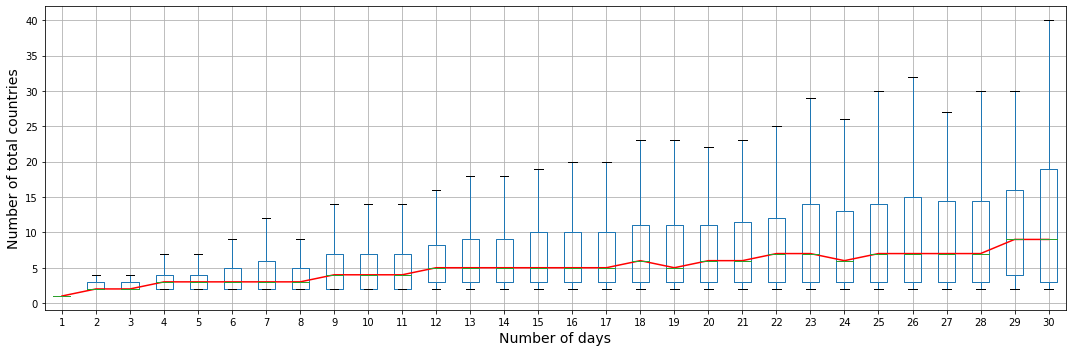

In [43]:
days_to_show= 31
countries_to_show=40
ax=days_df[np.arange(1,days_to_show)].boxplot(figsize=(15,5), grid=True, showfliers=False);
days_df[np.arange(1,days_to_show)].median(axis=0).plot(ax=ax, color='red', grid=True);
ax.set_xlabel('Number of days', fontsize=14)
ax.set_ylabel('Number of total countries', fontsize=14)
ax.set_yticks(np.arange(0,countries_to_show+1,5))
plt.tight_layout()
plt.savefig(os.path.join('figs', 'songs_evolution_spotify.png'))

In [44]:
 print("That's all folks")

That's all folks


----------------------------------------------------------------------------